In [1]:
from sklearn import datasets
import scipy.io as scio
import numpy as np
traindata = scio.loadmat('E:\\.000心电\\实验室友情赞助文件\\彩云\\AF_fea_data\\10s\\traindataz.mat')#traindata = scio.loadmat('E:\\00心电\\af\\traindata.mat')#E:\00心电\af
data = traindata['traindataz']
trainlable = scio.loadmat('E:\\.000心电\\实验室友情赞助文件\\彩云\\AF_fea_data\\10s\\trainlable')#trainlable = scio.loadmat('E:\\00心电\\af\\trainlable.mat') 
lable = trainlable['trainlable'][0]
#traindata = scio.loadmat('E:\\00心电\\af\\traindata.mat')

In [2]:
testdata = scio.loadmat('E:\\.000心电\\实验室友情赞助文件\\彩云\\AF_fea_data\\10s\\2018挑战赛10s\\testdata201810s.mat')#traindata = scio.loadmat('E:\\00心电\\af\\traindata.mat')#E:\00心电\af
testdata = testdata['testdata201810s'][:,0:7]
testlable = scio.loadmat('E:\\.000心电\\实验室友情赞助文件\\彩云\\AF_fea_data\\10s\\2018挑战赛10s\\testtable201810s.mat')#trainlable = scio.loadmat('E:\\00心电\\af\\trainlable.mat') 
testlable = testlable['testtable201810s'][:,0]

In [67]:
testlable.shape

(1804,)

In [59]:
lable.shape

(66900,)

In [34]:
data.shape

(66900, 7)

In [52]:
testdata.shape

(1804, 7)

In [43]:
testdata[2][0:7]

array([-1.58282426,  1.09861229,  2.96649128,  1.66509091,  1.512     ,
        1.788     ,  0.60827251])

In [41]:
data[0]

array([-0.68082171,  1.02961942,  3.43967043,  0.76333333,  0.508     ,
        1.06      ,  1.30549193])

In [3]:
np.random.seed(1)
np.random.shuffle(data) 
np.random.seed(1)
np.random.shuffle(lable)
np.random.seed(1)
np.random.shuffle(testdata) 
np.random.seed(1)
np.random.shuffle(testlable)

In [4]:
import torch
input = torch.FloatTensor(data)
label = torch.LongTensor(lable)
input_test = torch.FloatTensor(testdata)
label_test = torch.LongTensor(testlable)

In [5]:
input_train = input[0:60001]
label_train = label[0:60001]

input_valid = input[60001:]
label_valid = label[60001:]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import torch.nn.functional as Fun
# 定义BP神经网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden,n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden2)
        #self.hidden3 = torch.nn.Linear(n_hidden2, n_hidden3)
        #self.hidden4 = torch.nn.Linear(n_hidden3, n_hidden4)
        self.out = torch.nn.Linear(n_hidden2, n_output)
        
    def forward(self,x):
        x = Fun.relu(self.hidden(x))
        x = Fun.relu(self.hidden2(x))
        #x = Fun.relu(self.hidden3(x))
        #x = Fun.relu(self.hidden4(x))
        x = self.out(x)
        return x

In [13]:
net = Net(n_feature=7, n_hidden=10,n_hidden2=10,n_output=2)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
optimizer = torch.optim.Adam(net.parameters())
# SGD:随机梯度下降法
loss_func = torch.nn.CrossEntropyLoss()
# 设定损失函数

In [14]:
#开始训练
#并在每100轮输出结果（这里最好每轮都记录我们的损失和精度，需要改进代码）
losslist = []
speficlist = []
spefictestlist = []
spefictrainlist = []
for i in range(500):
    out = net(input_train)
    loss = loss_func(out, label_train)
    if(i%1 == 0):
        #print(loss)
        losslist.append(loss)
        out_test = net(input_valid)
        # out是一个计算矩阵
        prediction = torch.max(out_test, 1)[1]
        pred_y = prediction.numpy()
        # 预测y输出数列
        target_y = label_valid.data.numpy()
        speficvalid = np.sum(pred_y == target_y)/(np.sum(pred_y == target_y) +np.sum(pred_y != target_y) )
        speficlist.append(speficvalid)
        #plt.figure('Draw')

        out_train = net(input_train)
        # out是一个计算矩阵
        prediction = torch.max(out_train, 1)[1]
        pred_y = prediction.numpy()
        # 预测y输出数列
        target_y = label_train.data.numpy()
        spefictrain = np.sum(pred_y == target_y)/(np.sum(pred_y == target_y) +np.sum(pred_y != target_y) )
        spefictrainlist.append(spefictrain)
        
        out_test = net(input_test)
        # out是一个计算矩阵
        prediction = torch.max(out_test, 1)[1]
        pred_y = prediction.numpy()
        # 预测y输出数列
        target_y = label_test.data.numpy()
        spefic = np.sum(pred_y == target_y)/(np.sum(pred_y == target_y) +np.sum(pred_y != target_y) )
        spefictestlist.append(spefic)
        
        print(i,loss,spefictrain,speficvalid,spefic)
        #plt.plot(speficlist)  # plot绘制折线图
        #plt.draw()  # 显示绘图
        #plt.pause(2)  #显示5秒
        #plt.close()
    # 输出与label对比
    optimizer.zero_grad()
    # 初始化
    loss.backward()
    optimizer.step()

0 tensor(0.7846, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
1 tensor(0.7769, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
2 tensor(0.7694, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
3 tensor(0.7622, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
4 tensor(0.7553, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
5 tensor(0.7486, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
6 tensor(0.7422, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
7 tensor(0.7359, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
8 tensor(0.7300, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
9 tensor(0.7242, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
10 tensor(0.7187, grad_fn=<NllLossBackward>) 0.4999583340277662 0.5003623713581679 0.5
11 tensor(0.7133, grad_fn=<NllLossBackward>) 0.499958

86 tensor(0.4976, grad_fn=<NllLossBackward>) 0.8889518508024866 0.8899840556602406 0.8298226164079823
87 tensor(0.4947, grad_fn=<NllLossBackward>) 0.8902351627472875 0.8909986954631106 0.835920177383592
88 tensor(0.4918, grad_fn=<NllLossBackward>) 0.8918351360810653 0.8933178721553848 0.8409090909090909
89 tensor(0.4889, grad_fn=<NllLossBackward>) 0.8935517741370977 0.8943325119582548 0.8475609756097561
90 tensor(0.4859, grad_fn=<NllLossBackward>) 0.8951517474708754 0.8963617915639948 0.8536585365853658
91 tensor(0.4829, grad_fn=<NllLossBackward>) 0.8967683871935468 0.8985360197130019 0.8586474501108647
92 tensor(0.4798, grad_fn=<NllLossBackward>) 0.8981350310828153 0.8988259167995362 0.8608647450110865
93 tensor(0.4767, grad_fn=<NllLossBackward>) 0.8992016799720005 0.8999855051456733 0.8658536585365854
94 tensor(0.4735, grad_fn=<NllLossBackward>) 0.9003849935834403 0.901724887664879 0.8713968957871396
95 tensor(0.4704, grad_fn=<NllLossBackward>) 0.9018183030282828 0.9024496303812146 0

165 tensor(0.2612, grad_fn=<NllLossBackward>) 0.9291511808136531 0.9266560371068271 0.9717294900221729
166 tensor(0.2596, grad_fn=<NllLossBackward>) 0.9291011816469725 0.9268009856500942 0.9717294900221729
167 tensor(0.2580, grad_fn=<NllLossBackward>) 0.929051182480292 0.9268009856500942 0.9717294900221729
168 tensor(0.2565, grad_fn=<NllLossBackward>) 0.9292178463692272 0.9269459341933614 0.9717294900221729
169 tensor(0.2550, grad_fn=<NllLossBackward>) 0.9291845135914402 0.9270908827366285 0.9717294900221729
170 tensor(0.2535, grad_fn=<NllLossBackward>) 0.9292511791470142 0.9270908827366285 0.9717294900221729
171 tensor(0.2520, grad_fn=<NllLossBackward>) 0.9293011783136947 0.9269459341933614 0.9717294900221729
172 tensor(0.2506, grad_fn=<NllLossBackward>) 0.929434509424843 0.9269459341933614 0.9717294900221729
173 tensor(0.2493, grad_fn=<NllLossBackward>) 0.929434509424843 0.9270908827366285 0.9717294900221729
174 tensor(0.2479, grad_fn=<NllLossBackward>) 0.9294678422026299 0.927090882

244 tensor(0.2029, grad_fn=<NllLossBackward>) 0.930851152480792 0.9265110885635599 0.9745011086474501
245 tensor(0.2026, grad_fn=<NllLossBackward>) 0.930851152480792 0.9265110885635599 0.9745011086474501
246 tensor(0.2023, grad_fn=<NllLossBackward>) 0.9308678188696855 0.9265110885635599 0.9745011086474501
247 tensor(0.2021, grad_fn=<NllLossBackward>) 0.9309011516474726 0.9265110885635599 0.9745011086474501
248 tensor(0.2019, grad_fn=<NllLossBackward>) 0.9309011516474726 0.9265110885635599 0.9745011086474501
249 tensor(0.2016, grad_fn=<NllLossBackward>) 0.9309178180363661 0.9266560371068271 0.9745011086474501
250 tensor(0.2014, grad_fn=<NllLossBackward>) 0.9309511508141531 0.9266560371068271 0.9745011086474501
251 tensor(0.2012, grad_fn=<NllLossBackward>) 0.9309678172030467 0.9266560371068271 0.9750554323725056
252 tensor(0.2009, grad_fn=<NllLossBackward>) 0.9310344827586207 0.9266560371068271 0.9750554323725056
253 tensor(0.2007, grad_fn=<NllLossBackward>) 0.9310511491475142 0.92665603

323 tensor(0.1914, grad_fn=<NllLossBackward>) 0.9316844719254679 0.9279605739962313 0.9772727272727273
324 tensor(0.1913, grad_fn=<NllLossBackward>) 0.9316678055365744 0.9279605739962313 0.9772727272727273
325 tensor(0.1912, grad_fn=<NllLossBackward>) 0.9316511391476808 0.9281055225394985 0.9772727272727273
326 tensor(0.1911, grad_fn=<NllLossBackward>) 0.9316511391476808 0.9281055225394985 0.9772727272727273
327 tensor(0.1910, grad_fn=<NllLossBackward>) 0.9316844719254679 0.9279605739962313 0.9772727272727273
328 tensor(0.1909, grad_fn=<NllLossBackward>) 0.9317011383143614 0.9279605739962313 0.9772727272727273
329 tensor(0.1908, grad_fn=<NllLossBackward>) 0.9316844719254679 0.9279605739962313 0.9772727272727273
330 tensor(0.1908, grad_fn=<NllLossBackward>) 0.9316678055365744 0.9279605739962313 0.9772727272727273
331 tensor(0.1907, grad_fn=<NllLossBackward>) 0.9316678055365744 0.9281055225394985 0.9772727272727273
332 tensor(0.1906, grad_fn=<NllLossBackward>) 0.9316511391476808 0.928105

402 tensor(0.1860, grad_fn=<NllLossBackward>) 0.9324177930367827 0.9298449050587042 0.975609756097561
403 tensor(0.1859, grad_fn=<NllLossBackward>) 0.9324511258145698 0.9298449050587042 0.975609756097561
404 tensor(0.1858, grad_fn=<NllLossBackward>) 0.9324677922034633 0.9298449050587042 0.975609756097561
405 tensor(0.1858, grad_fn=<NllLossBackward>) 0.9324844585923568 0.9298449050587042 0.975609756097561
406 tensor(0.1857, grad_fn=<NllLossBackward>) 0.9325344577590373 0.9298449050587042 0.975609756097561
407 tensor(0.1857, grad_fn=<NllLossBackward>) 0.9325344577590373 0.9298449050587042 0.975609756097561
408 tensor(0.1856, grad_fn=<NllLossBackward>) 0.9325677905368244 0.9299898536019713 0.975609756097561
409 tensor(0.1856, grad_fn=<NllLossBackward>) 0.9326011233146114 0.9299898536019713 0.975609756097561
410 tensor(0.1855, grad_fn=<NllLossBackward>) 0.9325844569257179 0.9299898536019713 0.975609756097561
411 tensor(0.1854, grad_fn=<NllLossBackward>) 0.9325844569257179 0.929989853601971

482 tensor(0.1819, grad_fn=<NllLossBackward>) 0.9338011033149447 0.9315842875779099 0.975609756097561
483 tensor(0.1819, grad_fn=<NllLossBackward>) 0.9338011033149447 0.931729236121177 0.975609756097561
484 tensor(0.1818, grad_fn=<NllLossBackward>) 0.9338177697038382 0.931729236121177 0.975609756097561
485 tensor(0.1818, grad_fn=<NllLossBackward>) 0.9338344360927318 0.931729236121177 0.975609756097561
486 tensor(0.1817, grad_fn=<NllLossBackward>) 0.9338511024816253 0.931729236121177 0.975609756097561
487 tensor(0.1817, grad_fn=<NllLossBackward>) 0.9338344360927318 0.931729236121177 0.975609756097561
488 tensor(0.1816, grad_fn=<NllLossBackward>) 0.9338511024816253 0.9315842875779099 0.975609756097561
489 tensor(0.1816, grad_fn=<NllLossBackward>) 0.9338677688705188 0.9315842875779099 0.975609756097561
490 tensor(0.1815, grad_fn=<NllLossBackward>) 0.9339011016483059 0.9315842875779099 0.975609756097561
491 tensor(0.1815, grad_fn=<NllLossBackward>) 0.9339177680371994 0.9315842875779099 0.9

In [15]:
net

Net(
  (hidden): Linear(in_features=7, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)

In [83]:
h1 = net.hidden.weight.t()

In [84]:
h1 = net.out.weight.t()*100
h1 = h1.int()
h1

tensor([[ 45, -25],
        [-49,  10],
        [ 11,   1],
        [  3, -35],
        [ -5, -10],
        [ 12, -13],
        [ -6, -10],
        [ 27,  25],
        [ 18, -24],
        [-12,  19]], dtype=torch.int32)

In [85]:
b = net.out.bias*100
b = b.int()
b

tensor([-7, -2], dtype=torch.int32)

In [107]:
# 11. 从这一步开始，不再使用torch框架 
#这里将每层的参数提取出来
#并直接计算作为比较
hw = net.hidden.weight.t()*1024
hw = hw.int()
hb = net.hidden.bias*1024
hb = hb.int()
hw2 = net.hidden2.weight.t()*1024
hw2 = hw2.int()
hb2 = net.hidden2.bias*1024
hb2 = hb2.int()
hw3 = net.hidden3.weight.t()*1024
hw3 = hw3.int()
hb3 = net.hidden3.bias*1024
hb3 = hb3.int()
hw4 = net.hidden4.weight.t()*1024
hw4 = hw4.int()
hb4 = net.hidden4.bias*1024
hb4 = hb4.int()
ow = net.out.weight.t()*1024
ow = ow.int()
ob = net.out.bias*1024
ob = ob.int()

In [128]:
ob

array([-78, -21])

In [108]:
# 12. 
#将数据转换入为numpy,方便计算
w = hw.numpy()
hb = hb.numpy()
hw2 = hw2.numpy()
hb2 = hb2.numpy()
hw3 = hw3.numpy()
hb3 = hb3.numpy()
hw4 = hw4.numpy()
hb4 = hb4.numpy()
ow = ow.numpy()
ob = ob.numpy()

In [109]:
# 13. 
#这里讲数据数据不用框架，进行检查
dataint = data
dataint = dataint*1024
dataint = dataint.astype(int)
input_trainint = dataint[0:60001]
label_trainint = label[0:60001]

input_validint = dataint[60001:]
label_validint = label[60001:]

testdataint = testdata
testdataint = testdataint*1024
testdataint = testdataint.astype(int)
input_testint = testdataint
label_testint = testlable

In [110]:
count = 0
for i in range(len(input_trainint)):
    A = input_trainint[i]
    B = np.dot(A,hw)//1024 + hb
    B = np.maximum(B, 0)
    C = np.dot(B,hw2)//1024 + hb2
    C = np.maximum(C, 0)
    D = np.dot(C,hw3)//1024 + hb3
    D = np.maximum(D, 0)
    E = np.dot(D,hw4)//1024 + hb4
    E = np.maximum(E, 0)
    F = np.dot(E,ow)//1024 + ob
    if F[0] > F[1]:
        k = 0
    else:
        k = 1
    if k == label_trainint[i]:
        count = count + 1
spefic = count / len(input_trainint)
spefic

0.9375010416493058

In [111]:
count = 0
for i in range(len(input_validint)):
    A = input_validint[i]
    B = np.dot(A,hw)//1024 + hb
    B = np.maximum(B, 0)
    C = np.dot(B,hw2)//1024 + hb2
    C = np.maximum(C, 0)
    D = np.dot(C,hw3)//1024 + hb3
    D = np.maximum(D, 0)
    E = np.dot(D,hw4)//1024 + hb4
    E = np.maximum(E, 0)
    F = np.dot(E,ow)//1024 + ob
    if F[0] > F[1]:
        k = 0
    else:
        k = 1
    if k == label_validint[i]:
        count = count + 1
spefic = count / len(input_validint)
spefic

0.9373822293085955

In [112]:
count = 0
for i in range(len(input_testint)):
    A = input_testint[i]
    B = np.dot(A,hw)//1024 + hb
    B = np.maximum(B, 0)
    C = np.dot(B,hw2)//1024 + hb2
    C = np.maximum(C, 0)
    D = np.dot(C,hw3)//1024 + hb3
    D = np.maximum(D, 0)
    E = np.dot(D,hw4)//1024 + hb4
    E = np.maximum(E, 0)
    F = np.dot(E,ow)//1024 + ob
    if F[0] > F[1]:
        k = 0
    else:
        k = 1
    if k == label_testint[i]:
        count = count + 1
spefic = count / len(input_testint)
spefic

0.9805986696230599

In [92]:
B = np.dot(A,hw)//10000 + hb
B

array([ 17653, -16923,  11225,  -7682,  12983,  32698,  18860,  -8597,
        17245,  -9692])

In [94]:
np.maximum(B, 0)

array([17653,     0, 11225,     0, 12983, 32698, 18860,     0, 17245,
           0])

In [121]:
hw2

array([[ -19,  -26,  468,  452,  284,  267,  392,  258,   44,  199],
       [-266, -114,  301,   77,  160,   51, -112, -232, -162,   -7],
       [-239,  147,  -10,  242,   52,  420,  385,  229,  102,   91],
       [  42,  -45, -204,  -82,  304,   49, -235, -205,   24, -132],
       [ 526, -142, -561, -371,  366, -440, -366, -531,  135,  273],
       [  93, -323,  284,  334,  285,  275,  283,   89,   21,  474],
       [ 474,  274, -314, -326,   86,  -16, -436, -311,  408,  495],
       [ 198, -163, -216,   23,   88,  222,  -61,  221,  126,  -95],
       [ 312,   90, -330,   -6,  258, -418,  283,  152,  433,  535],
       [-199,  -33,  171,  306,  240,  -83,   36, -172, -192,  -32]])

In [23]:
out_valid = net(input_valid)
# out是一个计算矩阵
prediction = torch.max(out_valid, 1)[1]
pred_valid_y = prediction.numpy()
# 预测y输出数列
target_valid_y = label_valid.data.numpy()
# 实际y输出数据

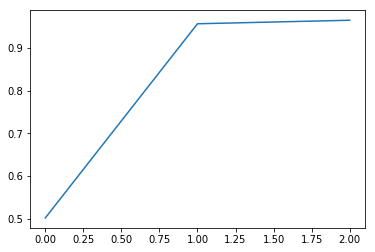

In [19]:
plt.figure('Draw')
plt.plot(speficlist[0:3])  # plot绘制折线图
plt.draw()  # 显示绘图
plt.pause(2)  #显示5秒
plt.close()

In [ ]:
speficlist[249]

In [24]:
spefic = np.sum(pred_valid_y == target_valid_y)/(np.sum(pred_valid_y == target_valid_y) +np.sum(pred_valid_y != target_valid_y) )
spefic

0.9831024930747922

In [32]:
torch.save(net, '5net.pkl')

C:\Users\CC_Never_Give_Up\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [33]:
data[100]

array([-2.71619268,  0.07673379,  4.19551785,  0.97972414,  0.956     ,
        1.004     ,  1.02040816])

In [65]:
kk = data[500]*100
kk =kk.astype(int)
kk

array([-272,   14,  436,  105,  102,  108,   94])

In [64]:
label[500]

tensor(0)

In [ ]:
net

In [ ]:
Hw = net.hidden.weight
Hw = Hw.t()
Hb = net.hidden.bias
Ow = net.out.weight
Ow = Ow.t()
Ob = net.out.bias

In [ ]:
net.hidden2.weight

In [ ]:
d = input[1000]
hidden = torch.matmul(d,Hw)+Hb
res = torch.matmul(hidden,Ow) + Ob
res
#######

In [ ]:
label[1000]

In [ ]:
Hw

In [ ]:
Hb

In [ ]:
Ow

In [ ]:
Ob

In [ ]:
gg

In [ ]:
Ob